In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.descriptivestats import sign_test
import pandas as pd
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

# Ćwiczenie 1


Różnice wag: [15  1 11  5  4 -2 10  7 -2  7  8  1  0  3 -2  4 -1  4  6  0]


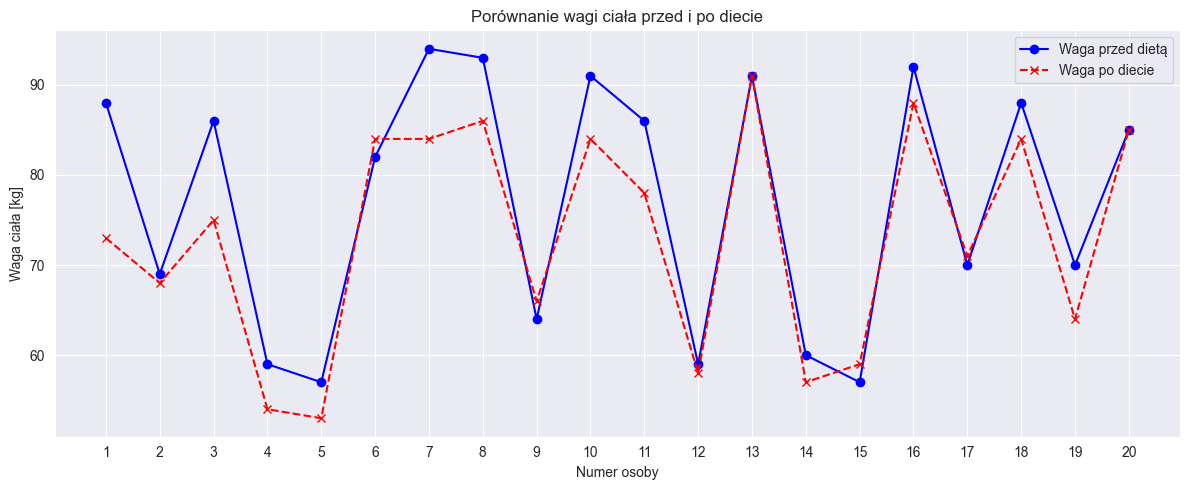

In [2]:
waga_przed = np.array([88, 69, 86, 59, 57, 82, 94, 93, 64, 91, 86, 59, 91, 60, 57, 92, 70, 88, 70, 85])
waga_po = np.array([73, 68, 75, 54, 53, 84, 84, 86, 66, 84, 78, 58, 91, 57, 59, 88, 71, 84, 64, 85])
roznice_wag = waga_przed - waga_po
print(f'Różnice wag: {roznice_wag}')
plt.figure(figsize=(12, 5))
plt.plot(waga_przed, label='Waga przed dietą', marker='o', linestyle='-', color='blue')
plt.plot(waga_po, label='Waga po diecie', marker='x', linestyle='--', color='red')
plt.title('Porównanie wagi ciała przed i po diecie')
plt.xlabel('Numer osoby')
plt.ylabel('Waga ciała [kg]')
plt.xticks(range(len(waga_przed)), range(1, len(waga_przed) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
test_statistic, p_value_statsmodels = sign_test(roznice_wag)

hipoteza_zerowa = "dieta nie powoduje zmniejszenia ciężaru ciała"
hipoteza_alternatywna = "dieta powoduje zmniejszenie ciężaru ciała"

alpha = 0.05
interpretacja_statsmodels = ("Możemy odrzucić hipotezę zerową; dieta powoduje zmniejszenie ciężaru ciała." if p_value_statsmodels <= alpha
                             else "Nie możemy odrzucić hipotezy zerowej; dieta nie powoduje zmniejszenia ciężaru ciała.")

print(f"""
Wynik testu znaków (statsmodels):
- Wartość statystyki testowej: {test_statistic}
- P-wartość: {p_value_statsmodels:.4f}
- Interpretacja: {interpretacja_statsmodels}
""")


Wynik testu znaków (statsmodels):
- Wartość statystyki testowej: 5.0
- P-wartość: 0.0309
- Interpretacja: Możemy odrzucić hipotezę zerową; dieta powoduje zmniejszenie ciężaru ciała.



# Ćwiczenie 2

In [4]:
file_path = 'data/czytelnictwo.csv'
czytelnictwo_df = pd.read_csv(file_path)

roznice_czytelnictwa = czytelnictwo_df['przed'] - czytelnictwo_df['po']

test_statistic_czytelnictwo, p_value_czytelnictwo = sign_test(roznice_czytelnictwa)

hipoteza_zerowa_czytelnictwo = "zatrudnienie nie miało wpływu na ilość czasu poświęcanego na lekturę prasy"
hipoteza_alternatywna_czytelnictwo = "zatrudnienie może mieć wpływ na ilość czasu poświęcanego na lekturę prasy"

alpha_2 = 0.05
interpretacja_czytelnictwo = ("Możemy odrzucić hipotezę zerową; " + hipoteza_alternatywna_czytelnictwo if p_value_czytelnictwo <= alpha
                              else "Nie możemy odrzucić hipotezy zerowej; " + hipoteza_zerowa_czytelnictwo)

# Wyniki
print(f"""
Wynik testu znaków:
- Wartość statystyki testowej: {test_statistic_czytelnictwo}
- P-wartość: {p_value_czytelnictwo:.4f}
- Interpretacja: {interpretacja_czytelnictwo}
""")


Wynik testu znaków:
- Wartość statystyki testowej: 12.0
- P-wartość: 0.0001
- Interpretacja: Możemy odrzucić hipotezę zerową; zatrudnienie może mieć wpływ na ilość czasu poświęcanego na lekturę prasy



# Ćwiczenie 3

In [5]:
chmiel_df = pd.read_csv('data/chmiel.csv')
result_3 = wilcoxon(chmiel_df['zapylona'], chmiel_df['niezapyl'])
stat_3 = result_3.statistic
p_value_3 = result_3.pvalue

hipoteza_zerowa_wilcoxon = "zapylenie nie ma wpływu na masę nasion chmielu"
hipoteza_alternatywna_wilcoxon = "zapylenie może mieć wpływ na masę nasion chmielu"

interpretacja_wilcoxon = ("Możemy odrzucić hipotezę zerową; " + hipoteza_alternatywna_wilcoxon if p_value_3 <= alpha
                          else "Akcpetujemy hipotezę zerową; " + hipoteza_zerowa_wilcoxon)

print(f"""
Wynik testu Wilcoxona dla mas nasion chmielu:
- Wartość statystyki testowej: {stat_3}
- P-wartość: {p_value_3:.4f}
- Interpretacja: {interpretacja_wilcoxon}
""")


Wynik testu Wilcoxona dla mas nasion chmielu:
- Wartość statystyki testowej: 0.0
- P-wartość: 0.0156
- Interpretacja: Możemy odrzucić hipotezę zerową; zapylenie może mieć wpływ na masę nasion chmielu



# Ćwiczenie 4

In [6]:
czytelnictwo_df_4 = pd.read_csv('data/czytelnictwo.csv')

result_czytelnictwo_4 = wilcoxon(czytelnictwo_df_4['po'], czytelnictwo_df_4['przed'])

statistic_czytelnictwo_4 = result_czytelnictwo_4.statistic
p_value_czytelnictwo_4 = result_czytelnictwo_4.pvalue

hipoteza_zerowa_czytelnictwo_4 = "średni czas poświęcany na czytanie prasy nie zmienił się po przyjęciu do pracy"
hipoteza_alternatywna_czytelnictwo_4 = "średni czas poświęcany na czytanie prasy zmienił się po przyjęciu do pracy"

interpretacja_czytelnictwo_4 = ("Możemy odrzucić hipotezę zerową; " + hipoteza_alternatywna_czytelnictwo_4 if p_value_czytelnictwo_4 <= alpha
                                else "Akcpetujemy hipotezę zerową; " + hipoteza_zerowa_czytelnictwo_4)

print(f"""
Wynik testu Wilcoxona dla czasu poświęconego na czytanie prasy przed i po przyjęciu do pracy:
- Wartość statystyki testowej: {statistic_czytelnictwo_4}
- P-wartość: {p_value_czytelnictwo_4:.4f}
- Interpretacja: {interpretacja_czytelnictwo_4}
""")


Wynik testu Wilcoxona dla czasu poświęconego na czytanie prasy przed i po przyjęciu do pracy:
- Wartość statystyki testowej: 235.5
- P-wartość: 0.0467
- Interpretacja: Możemy odrzucić hipotezę zerową; średni czas poświęcany na czytanie prasy zmienił się po przyjęciu do pracy



C:\Users\micha\anaconda3\envs\ZTAD\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


# Ćwiczenie 5

In [7]:
data = pd.read_csv('data/dane z koronografii.csv')

unique_groups = data['group'].unique()

number_of_groups = len(unique_groups)

# Podział danych na dwie grupy
group1 = data[data['group'] == 1]['time']
group2 = data[data['group'] == 2]['time']

# Przeprowadzenie testu Mann-Whitneya U
statistic_mw, p_value_mw = mannwhitneyu(group1, group2, alternative='two-sided')
alpha_mw = 0.1

hipoteza_zerowa_mw = "Czas ćwiczeń nie zależy od stanu zdrowia."
hipoteza_alternatywna_mw = "Czas ćwiczeń zależy od stanu zdrowia."

interpretacja_mw = ("Możemy odrzucić hipotezę zerową; " + hipoteza_alternatywna_mw if p_value_mw <= alpha_mw
                    else "Akceptujemy hipotezę zerową; " + hipoteza_zerowa_mw)

# Sformatowany wynik
print(f"""
Wynik testu Mann-Whitneya U dla czasu ćwiczeń w zależności od stanu zdrowia:
- Wartość statystyki testowej: {statistic_mw}
- P-wartość: {p_value_mw:.4f}
- Poziom ufności: {1 - alpha_mw}
- Interpretacja: {interpretacja_mw}
""")


Wynik testu Mann-Whitneya U dla czasu ćwiczeń w zależności od stanu zdrowia:
- Wartość statystyki testowej: 65.0
- P-wartość: 0.0294
- Poziom ufności: 0.9
- Interpretacja: Możemy odrzucić hipotezę zerową; Czas ćwiczeń zależy od stanu zdrowia.

